#  Output forcing field

## Definitions

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from Storms.parameters import *

In [6]:
from ipywidgets import *

In [7]:
from netCDF4 import Dataset

In [8]:
import datetime

## Read OutData file

In [9]:
tc=pd.read_csv('../tmp/step3.txt',delimiter='\t')

In [10]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
0,0.0,2016-09-29 12:00:00,MATTHEW,14.2,-65.5,995,-99,68524.0,30.866667,279652.0,...,19.534445,20.608431,26.161934,0.824513,2687.041711,0.098787,26.161934,26013.373175,3.003832,26.621949
1,1.0,2016-09-29 13:00:00,MATTHEW,14.2,-65.7,998,-99,46300.0,29.323333,288912.0,...,19.263473,20.915893,26.058509,0.849102,2575.365636,0.134372,26.058509,21960.064705,2.634959,26.448632
2,2.0,2016-09-29 14:00:00,MATTHEW,14.3,-65.9,997,-99,57412.0,33.953333,262984.0,...,19.538575,20.351526,30.315362,1.161375,2532.480755,0.239280,30.315362,19995.524368,2.827389,30.673483
3,3.0,2016-09-29 15:00:00,MATTHEW,14.3,-66.1,995,-99,48152.0,33.438889,253724.0,...,19.796023,20.766386,32.334880,1.044077,3184.888911,0.207510,32.334880,15661.528632,3.298494,32.614984
4,4.0,2016-09-29 16:00:00,MATTHEW,14.3,-66.3,993,-99,42596.0,33.953333,266688.0,...,20.326892,20.615410,32.122624,1.064447,3095.902038,0.184050,32.122624,19347.964022,3.666758,32.468297


Now we need to interpolate for every hour the location and compute translational velocities while keeping the rest of the attributes the same

In [11]:
tstamps = tc['t'].apply(pd.to_datetime)

In [12]:
tc = tc.set_index(tstamps)

In [13]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
t,,,,,,,,,,,,,,,,,,,,,
2016-09-29 12:00:00,0.0,2016-09-29 12:00:00,MATTHEW,14.2,-65.5,995,-99,68524.0,30.866667,279652.0,...,19.534445,20.608431,26.161934,0.824513,2687.041711,0.098787,26.161934,26013.373175,3.003832,26.621949
2016-09-29 13:00:00,1.0,2016-09-29 13:00:00,MATTHEW,14.2,-65.7,998,-99,46300.0,29.323333,288912.0,...,19.263473,20.915893,26.058509,0.849102,2575.365636,0.134372,26.058509,21960.064705,2.634959,26.448632
2016-09-29 14:00:00,2.0,2016-09-29 14:00:00,MATTHEW,14.3,-65.9,997,-99,57412.0,33.953333,262984.0,...,19.538575,20.351526,30.315362,1.161375,2532.480755,0.239280,30.315362,19995.524368,2.827389,30.673483
2016-09-29 15:00:00,3.0,2016-09-29 15:00:00,MATTHEW,14.3,-66.1,995,-99,48152.0,33.438889,253724.0,...,19.796023,20.766386,32.334880,1.044077,3184.888911,0.207510,32.334880,15661.528632,3.298494,32.614984
2016-09-29 16:00:00,4.0,2016-09-29 16:00:00,MATTHEW,14.3,-66.3,993,-99,42596.0,33.953333,266688.0,...,20.326892,20.615410,32.122624,1.064447,3095.902038,0.184050,32.122624,19347.964022,3.666758,32.468297


In [14]:
tc_ = tc.resample('H').mean()

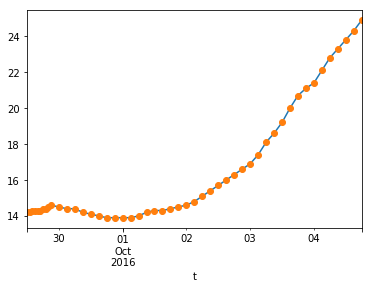

In [15]:
ax = tc_['lat'].interpolate(method='linear').plot()
tc_['lat'].plot(ax=ax, marker='o')

In [16]:
data = tc_.interpolate(method='cubic')

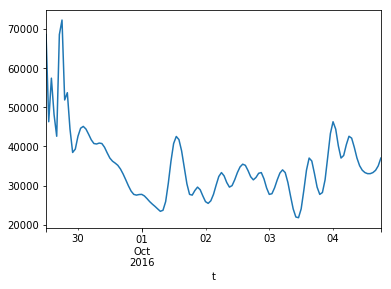

In [17]:
ax=data['rmax'].plot()

# From lat lon to r, th

In [18]:
    # required function
    from math import radians, cos, sin, asin, sqrt
    def Haversine(lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        # convert decimal degrees to radians 
        lon1, lat1 = np.radians([lon1, lat1])
        lon2, lat2 = np.radians([ lon2, lat2])

        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a)) 
        km = 6378.388 * c
        m = km * 1000
        return  m

In [19]:
def pres(r):
    return pn+dph*np.exp(-(rmaxh/r)**bh)

In [20]:
def hvel(r,dph,bh,rmaxh,kh):
    ratio=(r-rmaxh)/(maxR-rmaxh)
    x=0.5+ratio*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [21]:
def hvel_(r,dph,bh,rmaxh,kh):
    ratio=(r-rmaxh)/(maxR-rmaxh)
    ratio2=np.minimum(np.maximum(ratio,0),1)# control the slope at high radius
    x=0.5+ratio2*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [22]:
def hvel_(r,dph,bh,rmaxh,kh):
    ratio=(r-rmaxh)/(maxR-rmaxh)
    ratio2=np.minimum(np.maximum(ratio,0),1)# control the slope at high radius
    x=0.5+ratio2*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [23]:
def hvel2d(l1,l2,lon0,lat0):
    r = Haversine(l1, l2, lon0, lat0)
    ratio=(r-rmaxh)/(maxR-rmaxh)
    ratio2=np.minimum(np.maximum(ratio,0),1)# control the slope at high radius
    xh=0.5+ratio2*kh
    theta=np.arctan2((l2-lat0),(l1-lon0))
    fcor = 2*omega*np.sin(theta) #coriolis force
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh)+(r*fcor/2.)**2)**xh-r*fcor/2.
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh


    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx*(1.-np.exp(-(rmaxh/r)**bh)),uy+vty*(1.-np.exp(-(rmaxh/r)**bh)), pres(r)

## for one time stamp

In [24]:
i=20

In [25]:
#define lat/lon window
minlon=tc.lon[i]-1.
maxlon=tc.lon[i]+1.
minlat=tc.lat[i]-1.
maxlat=tc.lat[i]+1.

In [26]:
lons=np.linspace(minlon, maxlon,100) # constract arrays
lats=np.linspace(minlat, maxlat,100)

In [27]:
q1,q2=np.meshgrid(lons,lats) # create grid

In [28]:
#compute u,v,p

In [29]:
bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]

In [30]:
zx,zy,pr=hvel2d(q1,q2,tc.lon[i],tc.lat[i])
vel=np.sqrt(zx**2+zy**2)

Plot 1D Holland function

In [57]:
maxR=500.e3

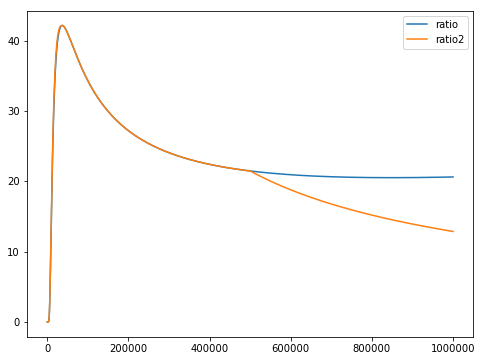

In [58]:
plt.figure(figsize=(8,6))
rh=np.linspace(0.01,2*maxR,1000)
sol=hvel(rh,dph,bh,rmaxh,kh)
sol_=hvel_(rh,dph,bh,rmaxh,kh)
plt.plot(rh,sol, label='ratio')
plt.plot(rh,sol_,label='ratio2')
plt.legend()


In [59]:
#find the local minima
lm = np.r_[True,sol[1:] < sol[:-1]] & np.r_[sol[:-1] < sol[1:], True]

rloc = np.argwhere(sol==sol[lm][1]) # index of local minima

rh[rloc]

array([[ 847847.84936937]])

TypeError: Input z must be a 2D array.

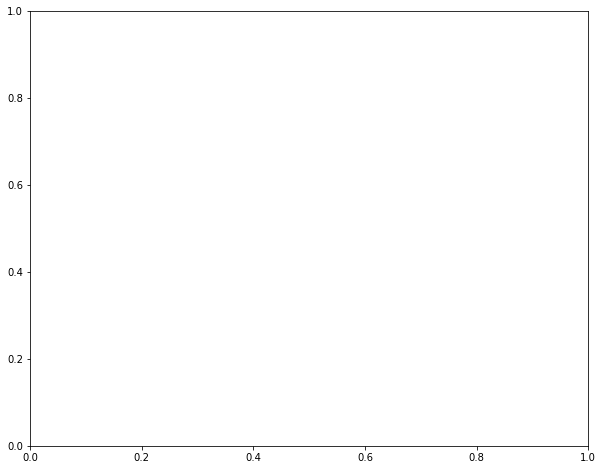

In [60]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel,20)
plt.streamplot(q1,q2,zx,zy, color=vel, linewidth=0.1*vel)
plt.colorbar()
#plt.quiver(q1,q2,zx,zy,scale=700)


## compute for all time steps

In [35]:
#Define the big window
minlon=tc.lon.min()-10.
maxlon=tc.lon.max()+10.
minlat=tc.lat.min()-10.
maxlat=tc.lat.max()+10.

In [36]:
lons=np.linspace(minlon, maxlon,100) # constract arrays
lats=np.linspace(minlat, maxlat,100)

In [37]:
q1,q2=np.meshgrid(lons,lats) # create grid for the whole domain

In [38]:
ux=[]
uy=[]
pp=[]
for i in range(tc.shape[0]):
    bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]
    zx,zy,pr=hvel2d(q1,q2,tc.lon[i],tc.lat[i])
    ux.append(zx)
    uy.append(zy)
    pp.append(pr)

In [39]:
ux = np.array(ux)
uy = np.array(uy)
pp = np.array(pp)

In [40]:
vel=np.sqrt(ux**2+uy**2)

In [41]:
vel.max()

47.724627695888572

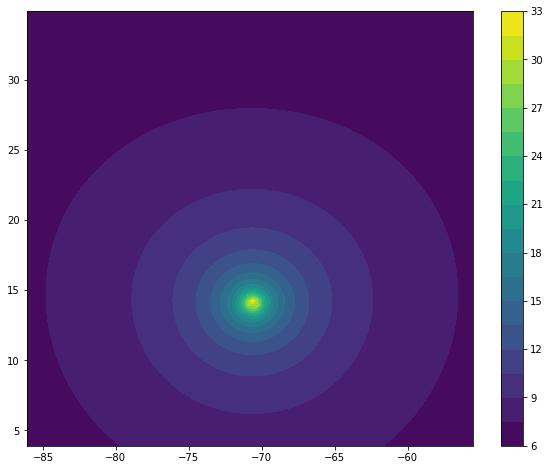

In [42]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel[15,:,:],20)
plt.colorbar()
#plt.quiver(q1,q2,zx,zy,scale=700)


### Visualize

In [43]:
def v2d(i):
        fig, (a,b) = plt.subplots(1,2,figsize=(20,10),gridspec_kw = {'width_ratios':[1, 3]})
        i=int(i)
        c=b.contourf(q1,q2,vel[i,:,:],20)
  #      plt.streamplot(q1,q2,uy[i,:,:],uy[i,:,:], color=vel, linewidth=0.1*vel)
        cl = plt.colorbar(c)
        cl.set_label('Wind m/s', rotation=270)
        b.set_xlabel('lon')
        b.set_ylabel('lat')
        rh=np.linspace(0.01,3*maxR,100)
        bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]
        a.plot(rh,hvel_(rh,dph,bh,rmaxh,kh))
        a.set_ylabel('Max Wind m/s')
        a.set_xlabel('Radius m')
        plt.title(tc.ix[i].t)
        plt.show()

In [44]:
interact(v2d,i=widgets.IntSlider(min=0,max=ux.shape[0]-1,step=1,value=0))

<function __main__.v2d>

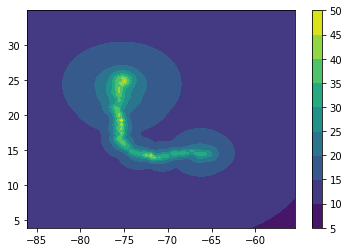

In [45]:
#print the wind swath
plt.contourf(q1,q2,np.amax(vel,axis=0))
plt.colorbar()

In [46]:
# we can now use pandas to interpolate every e.g. 5min
tc5 = tc.resample('1min').mean()

In [47]:
tc5=tc5.interpolate(method='linear')

In [48]:
ux=[]
uy=[]
pp=[]
for i in range(tc5.shape[0]):
    bh,kh,dph,rmaxh,vtx,vty = tc5.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]
    zx,zy,pr=hvel2d(q1,q2,tc5.lon[i],tc5.lat[i])
    ux.append(zx)
    uy.append(zy)
    pp.append(pr)

In [49]:
ux = np.array(ux)
uy = np.array(uy)
pp = np.array(pp)

In [50]:
vel=np.sqrt(ux**2+uy**2)

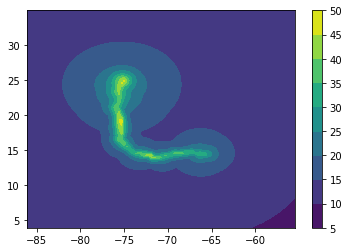

In [51]:
#print the wind swath
plt.contourf(q1,q2,np.amax(vel,axis=0))
plt.colorbar()

## save u,v,p

In [52]:
path='../tmp/'

In [53]:
#writing out a netcdf file with the data
filename = 'uvp.nc'
rootgrp = Dataset(path+filename, 'w', format='NETCDF3_64BIT') # initiate netcdf file

In [54]:
t0=datetime.datetime.strftime(tc5.index[0], '%Y%m%d.%H')

In [55]:
ni=lons.shape[0]
nj=lats.shape[0]

In [56]:
lat = rootgrp.createDimension('LAT', nj)
lon = rootgrp.createDimension('LON', ni)
time = rootgrp.createDimension('TIME', None)


longitudes = rootgrp.createVariable('LON','f8',('LON',))
latitudes = rootgrp.createVariable('LAT','f8',('LAT',))
u = rootgrp.createVariable('U','f8',('TIME','LAT','LON'))
v = rootgrp.createVariable('V','f8',('TIME','LAT','LON'))
times = rootgrp.createVariable('TIME','f8',('TIME',))
p = rootgrp.createVariable('P','f8',('TIME','LAT','LON'))

rootgrp.description = ''
rootgrp.history = 'JRC Ispra European Commission'
rootgrp.source = 'netCDF4 python module tutorial'
latitudes.units = 'degrees_north'
latitudes.point_spacing = 'even'
longitudes.units = 'degrees_east'
longitudes.point_spacing = 'even'
u.units = 'm/s'
v.units = 'm/s'
p.units = 'hPa'
times.units = 'hours since {}'.format(t0)


p[:]=pp
times[:]=tc.time.values
latitudes[:]=lats
longitudes[:]=lons
u[:]=ux
v[:]=uy
 
rootgrp.close()
